# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

3 Observable Trends:
1. There is a strong correlation between where a city is located and its max temperature. This correaltion is stronger in the northern hemisphere than in the southern hemisphere. 
2. There is almost no correlation between a city's latitude and it's cloudiness. The southern hemisphere has a slightly higher r value but, not by much.
3. Something that was surprised me was that there was not a huge relationship between a city's latitude and it's humidity. I thought cities closer to the equator would have more humidity but the graphs suggest otherwise. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Create lists for lat, temp (F), humidity(%), cloudiness(%), wind speed (mph)
lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []

count = 1
sets = 1

# Loop through the list of cities and perform a request for data on each, catch exceptions
print(f'Beginning Data Retrieval \n -----------------------')
for city in cities:
    try:
        print(f'Processing Record {count} of Set {sets} | {city}' )
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count = count + 1
    except KeyError:
        print(f'City not found. Skipping . . .')
    if count == 51: # create sets
        sets = sets + 1
        count = 1 #reset count
        
print(f' ---------------------------- \n Data Retrieval Complete \n ----------------------------')

Beginning Data Retrieval 
 -----------------------
Processing Record 1 of Set 1 | sisimiut
Processing Record 2 of Set 1 | provideniya
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | abnub
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | tayzhina
Processing Record 8 of Set 1 | algiers
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | dakar
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | vaitape
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | portland
Processing Record 16 of Set 1 | waingapu
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | biak
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | gazanjyk
Processing Record 23 of Set 1 | east london
Processing Record 24 of Set 

Processing Record 17 of Set 4 | tuktoyaktuk
Processing Record 18 of Set 4 | mezen
Processing Record 19 of Set 4 | bad aussee
Processing Record 20 of Set 4 | saint-pierre
Processing Record 21 of Set 4 | omboue
Processing Record 22 of Set 4 | belmonte
Processing Record 23 of Set 4 | dumai
Processing Record 24 of Set 4 | ilhabela
Processing Record 25 of Set 4 | half moon bay
Processing Record 26 of Set 4 | zaysan
Processing Record 27 of Set 4 | narrabri
Processing Record 28 of Set 4 | vostok
Processing Record 29 of Set 4 | mount isa
Processing Record 30 of Set 4 | ust-kuyga
Processing Record 31 of Set 4 | tharad
Processing Record 32 of Set 4 | vila velha
Processing Record 33 of Set 4 | athens
Processing Record 34 of Set 4 | chuy
Processing Record 35 of Set 4 | moose factory
Processing Record 36 of Set 4 | umm durman
City not found. Skipping . . .
Processing Record 36 of Set 4 | andenes
Processing Record 37 of Set 4 | nampula
Processing Record 38 of Set 4 | nizhneyansk
City not found. Skip

Processing Record 39 of Set 7 | sapao
City not found. Skipping . . .
Processing Record 39 of Set 7 | pangnirtung
Processing Record 40 of Set 7 | celendin
Processing Record 41 of Set 7 | buraydah
Processing Record 42 of Set 7 | shimoda
Processing Record 43 of Set 7 | namibe
Processing Record 44 of Set 7 | solovetskiy
City not found. Skipping . . .
Processing Record 44 of Set 7 | lazaro cardenas
Processing Record 45 of Set 7 | bilara
Processing Record 46 of Set 7 | amahai
Processing Record 47 of Set 7 | furstenwalde
Processing Record 48 of Set 7 | jacarei
Processing Record 49 of Set 7 | sorland
Processing Record 50 of Set 7 | roma
Processing Record 1 of Set 8 | ardee
Processing Record 2 of Set 8 | cascavel
Processing Record 3 of Set 8 | hasaki
Processing Record 4 of Set 8 | san cristobal
Processing Record 5 of Set 8 | barbar
City not found. Skipping . . .
Processing Record 5 of Set 8 | gorontalo
Processing Record 6 of Set 8 | asosa
Processing Record 7 of Set 8 | troitskoye
Processing Rec

Processing Record 16 of Set 11 | mitsamiouli
Processing Record 17 of Set 11 | vila franca do campo
Processing Record 18 of Set 11 | newport
Processing Record 19 of Set 11 | shimoni
Processing Record 20 of Set 11 | staryy nadym
Processing Record 21 of Set 11 | umzimvubu
City not found. Skipping . . .
Processing Record 21 of Set 11 | valley station
Processing Record 22 of Set 11 | hohhot
Processing Record 23 of Set 11 | karak
Processing Record 24 of Set 11 | yamada
Processing Record 25 of Set 11 | lianzhou
Processing Record 26 of Set 11 | imbituba
Processing Record 27 of Set 11 | suileng
Processing Record 28 of Set 11 | colac
Processing Record 29 of Set 11 | krishnarajasagara
Processing Record 30 of Set 11 | tilichiki
Processing Record 31 of Set 11 | russell
Processing Record 32 of Set 11 | casper
Processing Record 33 of Set 11 | opuwo
Processing Record 34 of Set 11 | visakhapatnam
Processing Record 35 of Set 11 | mayo
Processing Record 36 of Set 11 | tarakan
Processing Record 37 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create Df
weatherpy_df = pd.DataFrame(list(zip(cities, lat, lng, temp, hum, cloud, wind, country, date)), 
                            columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])


#Export City Data into csv file
weatherpy_df.to_csv("weatherpy.csv", index = False)

#Disply dataframe
weatherpy_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sisimiut,66.9395,-53.6735,31.93,75,59,5.91,GL,1619127300
1,provideniya,64.3833,-173.3000,37.40,56,0,15.66,RU,1619127608
2,mataura,-46.1927,168.8643,48.00,98,97,8.01,NZ,1619127609
3,abnub,27.2696,31.1511,78.80,29,0,11.50,EG,1619127609
4,qaanaaq,77.4840,-69.3632,16.36,80,87,10.38,GL,1619127609


In [7]:
weatherpy_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.082807,21.091450,59.433473,70.441536,55.905759,8.106213,1.619128e+09
std,33.432597,89.714255,19.857457,22.616802,38.073652,5.928186,2.152336e+02
min,-54.800000,-175.200000,-2.610000,7.000000,0.000000,0.310000,1.619127e+09
25%,-7.025300,-56.154900,45.000000,58.000000,20.000000,3.470000,1.619127e+09
50%,22.788600,23.916700,62.560000,77.000000,68.000000,6.620000,1.619128e+09
75%,47.804300,101.750000,77.000000,87.000000,94.000000,11.250000,1.619128e+09
max,78.218600,179.316700,94.240000,100.000000,100.000000,42.080000,1.619128e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

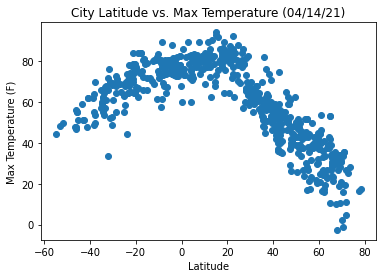

<Figure size 432x288 with 0 Axes>

In [8]:
#Create Scatter plot for Temp vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

plt.savefig("Images/lat_vs_maxtemp.png")

In this graph we are looking at the relationship between Latitude and Temperature of the different random cities we chose. From the looks of the graph it looks like there is a strong correlation between a cities latitude and its max temperature. 

## Latitude vs. Humidity Plot

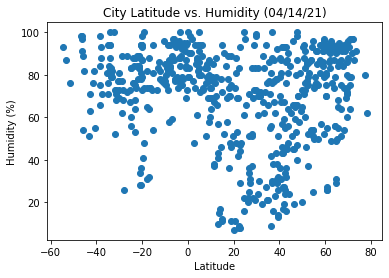

<Figure size 432x288 with 0 Axes>

In [9]:
#Create Scatter plot for Humidity vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

plt.savefig("Images/lat_vs_humidity.png")

Looking at the relationship between Latitude and Humidity, there seems to be little to no correlation.

## Latitude vs. Cloudiness Plot

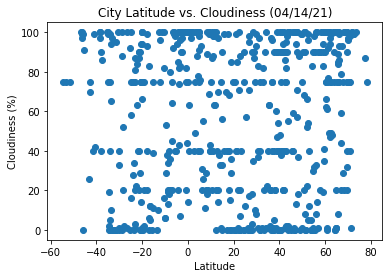

<Figure size 432x288 with 0 Axes>

In [10]:
#Create Scatter plot for Cloudiness vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

plt.savefig("Images/lat_vs_cloudiness.png")

Looking at the relationship between Latitude and Cloudiness, there seems to be no correlation. 

## Latitude vs. Wind Speed Plot

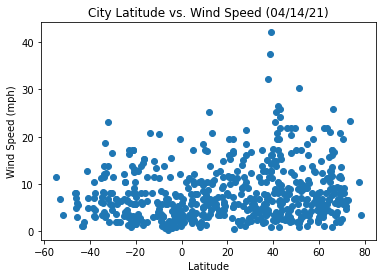

<Figure size 432x288 with 0 Axes>

In [11]:
#Create Scatter plot for Wind vs Lat
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

plt.savefig("Images/lat_vs_windspeed.png")

In this graph we are pulling the Latitude and Wind Speed data from all of the random cities and seeing if there is a correlation. Looking at the graph, there seems to be a correlations between the two. 

## Linear Regression

In [12]:
northernhem_df = weatherpy_df[weatherpy_df['Lat'] >= 0]
northernhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sisimiut,66.9395,-53.6735,31.93,75,59,5.91,GL,1619127300
1,provideniya,64.3833,-173.3000,37.40,56,0,15.66,RU,1619127608
3,abnub,27.2696,31.1511,78.80,29,0,11.50,EG,1619127609
4,qaanaaq,77.4840,-69.3632,16.36,80,87,10.38,GL,1619127609
6,tayzhina,53.6679,87.4362,23.85,87,5,4.41,RU,1619127610


In [13]:
southernhem_df = weatherpy_df[weatherpy_df['Lat'] < 0]
southernhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,mataura,-46.1927,168.8643,48.00,98,97,8.01,NZ,1619127609
5,bluff,-46.6000,168.3333,48.00,98,100,8.01,NZ,1619127610
8,vaini,-21.2000,-175.2000,84.20,84,40,5.75,TO,1619127610
10,punta arenas,-53.1500,-70.9167,48.20,87,75,6.91,CL,1619127611
11,vaitape,-16.5167,-151.7500,81.03,74,12,15.35,PF,1619127611


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8009736917287207


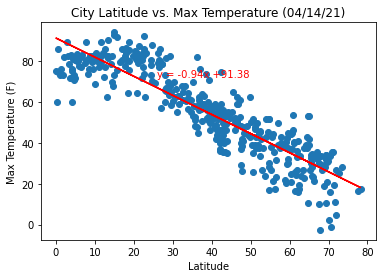

<Figure size 432x288 with 0 Axes>

In [15]:
#Create Scatter plot for max temp vs Lat
x_values = northernhem_df['Lat']
y_values = northernhem_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

plt.savefig("Images/lat_vs_maxtemp_north.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5463260791709366


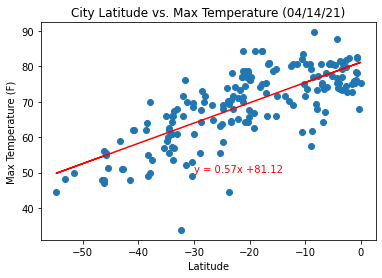

<Figure size 432x288 with 0 Axes>

In [16]:
#Create Scatter plot for max temp vs Lat
x_values = southernhem_df['Lat']
y_values = southernhem_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

plt.savefig("Images/lat_vs_maxtemp_south.png")

After splitting the cities into nortern and southern hemispheres, we were able to look at the relationships between latitude and max temperatures and location. As you can see there is a stronger correlation between latitude and max temperature in the northern hemisphere than the southern. The southern hemisphere still has a moderate correlation between latitude and max temperature. The higher your r-squared the better the linear regression fits the model. The r-value for the northern hemisphere graph shows a higher chance that the data will be near the regression line. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02159791511060939


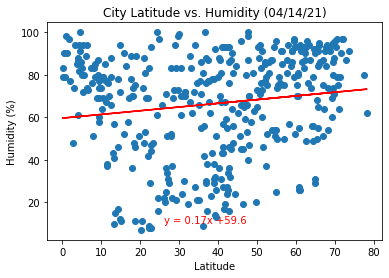

<Figure size 432x288 with 0 Axes>

In [17]:
#Create Scatter plot for humidity vs Lat
x_values = northernhem_df['Lat']
y_values = northernhem_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,10),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

plt.savefig("Images/lat_vs_humidity_north.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.015103071910179913


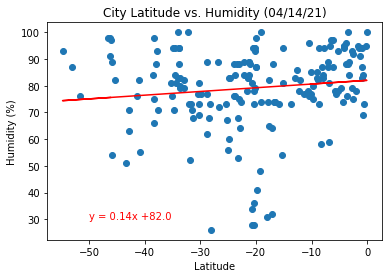

<Figure size 432x288 with 0 Axes>

In [18]:
#Create Scatter plot for humidity vs Lat
x_values = southernhem_df['Lat']
y_values = southernhem_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

plt.savefig("Images/lat_vs_humidity_south.png")

Looking at both of the graphs comparing Latitude and Humidity, you can see there is not much of a correlation. Both r-values are very low which means that the variables are not great at predicting each other. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01067484173298821


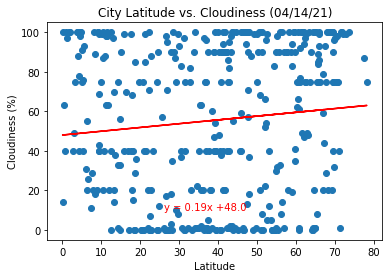

<Figure size 432x288 with 0 Axes>

In [19]:
#Create Scatter plot for cloudiness vs Lat
x_values = northernhem_df['Lat']
y_values = northernhem_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,10),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

plt.savefig("Images/lat_vs_cloudiness_north.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06187744839207731


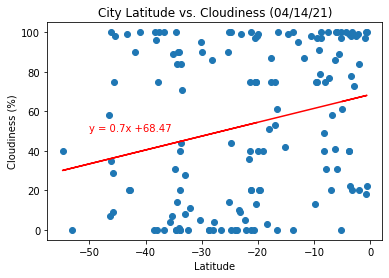

In [23]:
#Create Scatter plot for Cloudiness vs Lat
x_values = southernhem_df['Lat']
y_values = southernhem_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

plt.savefig("Images/lat_vs_cloudi.png")

Looking at both of the graphs comparing Latitude and Cloudiness, you can see there is not much of a correlation. Both r-values are very low which means that the variables are not great at predicting each other.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03953304769041333


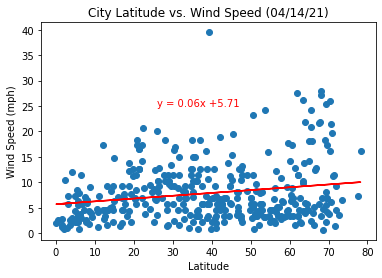

In [25]:
#Create Scatter plot for Wind vs Lat
x_values = northernhem_df['Lat']
y_values = northernhem_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,25),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10799752552506993


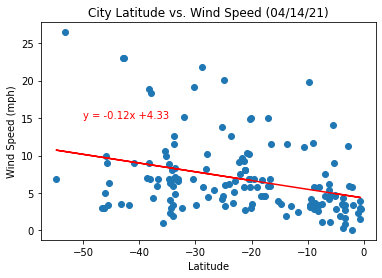

In [27]:
#Create Scatter plot for Wind vs Lat
x_values = southernhem_df['Lat']
y_values = southernhem_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

Looking at both of these graphs, I can see a slight correlation between latitude and wind speed. The first r-value is pretty low so the variables are not good for predicting each other. The second r-value is slightly higher but still low. 